<a href="https://colab.research.google.com/github/nedokormysh/GB_ML_business/blob/lesson6/ML_business_hw_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import itertools

from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import warnings
warnings.filterwarnings("ignore")

# 1-2
1. взять любой набор данных для бинарной классификации (можно скачать один с https://archive.ics.uci.edu/ml/datasets.php)
2. сделать feature engineering


In [5]:
! mkdir ~/.kaggle
from google.colab import files

files.upload()

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


! kaggle datasets download fedesoriano/heart-failure-prediction
! unzip -q '/content/heart-failure-prediction.zip'

Saving kaggle.json to kaggle.json
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 6.00MB/s]


In [6]:
df = pd.read_csv('/content/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [7]:
df.isnull().any().any()

False

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [10]:
df.shape

(918, 12)

In [11]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [12]:
rs = 7575

In [13]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['HeartDisease']), df['HeartDisease'], random_state=rs)

In [14]:
#соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    

class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]

In [15]:
# X_train['Oldpeak']

In [16]:
# df.columns

In [17]:
# df.dtypes

In [18]:
# df.head(3)

In [19]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
continuous_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR','Oldpeak']

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [21]:
# df['Oldpeak'].hist()

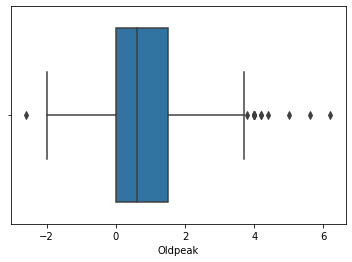

In [22]:
sns.boxplot(df['Oldpeak'])


In [23]:
def clean_outlier(df, value=-2):
    
    df.loc[df['Oldpeak'] < value, 'Oldpeak'] = df['Oldpeak'].median()
    
    return df

X_test = clean_outlier(X_test)
X_train = clean_outlier(X_train)

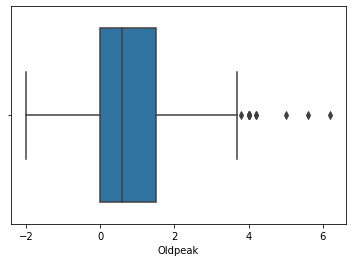

In [24]:
sns.boxplot(X_train['Oldpeak'])

In [25]:
final_transformers = list()

for cat_col in categorical_columns:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    
    final_transformers.append((cat_col, cat_transformer))
    
for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col))
            ])
    
    final_transformers.append((cont_col, cont_transformer))

In [26]:
final_transformers

[('Sex', Pipeline(steps=[('selector', FeatureSelector(column='Sex')),
                  ('ohe', OHEEncoder(key='Sex'))])),
 ('ChestPainType',
  Pipeline(steps=[('selector', FeatureSelector(column='ChestPainType')),
                  ('ohe', OHEEncoder(key='ChestPainType'))])),
 ('RestingECG',
  Pipeline(steps=[('selector', FeatureSelector(column='RestingECG')),
                  ('ohe', OHEEncoder(key='RestingECG'))])),
 ('ExerciseAngina',
  Pipeline(steps=[('selector', FeatureSelector(column='ExerciseAngina')),
                  ('ohe', OHEEncoder(key='ExerciseAngina'))])),
 ('ST_Slope', Pipeline(steps=[('selector', FeatureSelector(column='ST_Slope')),
                  ('ohe', OHEEncoder(key='ST_Slope'))])),
 ('Age', Pipeline(steps=[('selector', NumberSelector(key='Age'))])),
 ('RestingBP',
  Pipeline(steps=[('selector', NumberSelector(key='RestingBP'))])),
 ('Cholesterol',
  Pipeline(steps=[('selector', NumberSelector(key='Cholesterol'))])),
 ('FastingBS',
  Pipeline(steps=[('select

In [27]:
feats = FeatureUnion(final_transformers)

# 3. обучить любой классификатор (какой вам нравится)


In [28]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

pipeline = Pipeline([
    ('features', feats),
    ('classifier', GradientBoostingClassifier(random_state=rs)),
])

In [29]:
# обучим наш пайплайн
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Sex',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Sex')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Sex'))])),
                                                ('ChestPainType',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='ChestPainType')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='ChestPainType'))])),
                                                ('RestingECG',
                                                 Pipeline(steps=[('selector',
    

In [30]:
# наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_test)[:, 1]
preds[:10]

array([0.54082179, 0.96114144, 0.93466086, 0.03937294, 0.56493119,
       0.90239514, 0.00827256, 0.02684208, 0.97461902, 0.97781547])

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
df_results = pd.DataFrame(columns=['model', 'thresh', 'F-Score', 'Precision', 'Recall', 'ROC AUC'])

In [33]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

roc_auc = roc_auc_score(y_test, preds)
roc_auc

Best Threshold=0.3913707004054285, F-Score=0.882, Precision=0.835, Recall=0.935


0.9249087035909921

In [34]:
df_results = df_results.append({
    'model': 'supervised',
    'thresh': thresholds[ix],
    'F-Score': fscore[ix],
    'Precision': precision[ix],
    'Recall': recall[ix],
    'ROC AUC': roc_auc
}, ignore_index=True)

Confusion matrix, without normalization
[[ 83  23]
 [  9 115]]


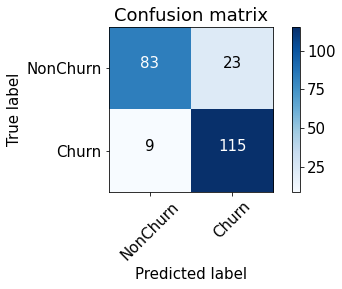

In [35]:
# мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds > thresholds[ix])
plt.figure(figsize=(6, 4))
plot_confusion_matrix(cnf_matrix, classes=['NonChurn', 'Churn'],
                      title='Confusion matrix')
#plt.savefig("conf_matrix.png")
plt.show()

# 4. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled).

Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть


In [36]:
mod_data = X_train.copy()
mod_data['HeartDisease'] = y_train
mod_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
810,55,F,ATA,135,250,0,LVH,161,N,1.4,Flat,0
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
876,60,M,ASY,130,206,0,LVH,132,Y,2.4,Flat,1
598,55,M,ASY,120,226,0,LVH,127,Y,1.7,Down,1
711,66,M,ASY,120,302,0,LVH,151,N,0.4,Flat,0


In [37]:
# get the indices of the positives samples
pos_ind = mod_data[mod_data['HeartDisease'] == 1].sample(frac=1, random_state=rs).index

# leave just 25% of the positives marked
perc = 0.25
pos_sample_len = int(np.ceil(perc * len(pos_ind)))

print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 96/384 as positives and unlabeling the rest


Создаем столбец для новой целевой переменной, где у нас два класса - P (1) и U (-1)

In [38]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample, 'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

target variable:
 -1    592
 1     96
Name: class_test, dtype: int64


In [39]:
mod_data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,class_test
810,55,F,ATA,135,250,0,LVH,161,N,1.4,Flat,0,-1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1,1
876,60,M,ASY,130,206,0,LVH,132,Y,2.4,Flat,1,-1


# 5. применить random negative sampling для построения классификатора в новых условиях

In [40]:
mod_data = mod_data.sample(frac=1, random_state=rs)


data_N = mod_data[mod_data['class_test'] == -1]
data_P = mod_data[mod_data['class_test'] == 1]

neg_sample = data_N[:data_P.shape[0]]
pos_sample = data_P.copy()

print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1, random_state=rs)

(96, 13) (96, 13)


In [41]:
sample_train.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,class_test
21,44,M,ATA,120,184,0,Normal,142,N,1.0,Flat,0,-1
155,56,M,ASY,155,342,1,Normal,150,Y,3.0,Flat,1,-1
808,35,M,ASY,126,282,0,LVH,156,Y,0.0,Up,1,1


In [42]:
sample_train.loc[sample_train['class_test'] == -1, 'class_test'] = 0

pipeline = Pipeline([
    ('features', feats),
    ('classifier', GradientBoostingClassifier(random_state=rs)),
])


pipeline.fit(sample_train.drop(columns=['class_test', 'HeartDisease']), 
             sample_train['class_test'])

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('Sex',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Sex')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Sex'))])),
                                                ('ChestPainType',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='ChestPainType')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='ChestPainType'))])),
                                                ('RestingECG',
                                                 Pipeline(steps=[('selector',
    

In [43]:
# наши прогнозы для тестовой выборки
preds = pipeline.predict_proba(X_test)[:, 1]
preds[:10]

array([0.96074924, 0.76425919, 0.92976712, 0.02428867, 0.58429358,
       0.46361101, 0.08073731, 0.01658082, 0.16157767, 0.1655569 ])

In [44]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

roc_auc = roc_auc_score(y_test, preds)
print(f'roc_auc = {roc_auc}')

df_results = df_results.append({
    'model': 'pu-learning',
    'thresh': thresholds[ix],
    'F-Score': fscore[ix],
    'Precision': precision[ix],
    'Recall': recall[ix],
    'ROC AUC': roc_auc
}, ignore_index=True)

Best Threshold=0.19233607240313277, F-Score=0.787, Precision=0.693, Recall=0.911
roc_auc = 0.8023432744978698


# 6. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)

In [45]:
df_results

,model,thresh,F-Score,Precision,Recall,ROC AUC
0,supervised,0.391371,0.882129,0.834532,0.935484,0.924909
1,pu-learning,0.192336,0.787456,0.693252,0.911290,0.802343


f-score уменьшился в основном из-за падения precision

# 7. поэкспериментировать с долей P на шаге 6 (как будет меняться качество модели при уменьшении/увеличении размера P)

In [46]:
p_list = np.arange(0.1, 1.1, 0.1)
# p_list

In [47]:
df_res = pd.DataFrame(columns=['p_frac', 'thresh', 'F-Score', 'Precision', 'Recall', 'ROC AUC'])


for p_frac in p_list:
    # print(p_frac)
    mod_data = X_train.copy()
    mod_data['HeartDisease'] = y_train
    mod_data.head()

    # get the indices of the positives samples
    pos_ind = mod_data[mod_data['HeartDisease'] == 1].sample(frac=1, random_state=42).index

    pos_sample_len = int(np.ceil(p_frac * len(pos_ind)))
    pos_sample = pos_ind[:pos_sample_len]
    
    mod_data['class_test'] = -1
    mod_data.loc[pos_sample,'class_test'] = 1
    
    mod_data = mod_data.sample(frac=1, random_state=42)


    data_N = mod_data[mod_data['class_test'] == -1]
    data_P = mod_data[mod_data['class_test'] == 1]

    neg_sample = data_N[:data_P.shape[0]]
    pos_sample = data_P.copy()

    sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1, random_state=42)

    sample_train.loc[sample_train['class_test'] == -1, 'class_test'] = 0

    pipeline = Pipeline([
        ('features', feats),
        ('classifier', GradientBoostingClassifier(random_state=rs)),
    ])

    pipeline.fit(sample_train.drop(columns=['class_test','HeartDisease']), 
                 sample_train['class_test'])
    
    # наши прогнозы для тестовой выборки
    preds = pipeline.predict_proba(X_test)[:, 1]
    preds[:10]

    precision, recall, thresholds = precision_recall_curve(y_test, preds)

    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    roc_auc = roc_auc_score(y_test, preds)

    df_res = df_res.append({
        'p_frac': p_frac,
        'thresh': thresholds[ix],
        'F-Score': fscore[ix],
        'Precision': precision[ix],
        'Recall': recall[ix],
        'ROC AUC': roc_auc
    }, ignore_index=True)

df_res

,p_frac,thresh,F-Score,Precision,Recall,ROC AUC
0,0.1,0.026125,0.823944,0.731250,0.943548,0.771607
1,0.2,0.250279,0.792857,0.711538,0.895161,0.783399
2,0.3,0.203943,0.836237,0.736196,0.967742,0.850350
3,0.4,0.370440,0.858238,0.817518,0.903226,0.861762
4,0.5,0.405530,0.841699,0.807407,0.879032,0.849437
5,0.6,0.398541,0.858238,0.817518,0.903226,0.885119
6,0.7,0.373363,0.863813,0.834586,0.895161,0.885651
7,0.8,0.287949,0.855019,0.793103,0.927419,0.883065
8,0.9,0.272608,0.869888,0.806897,0.943548,0.908551
9,1.0,0.391371,0.882129,0.834532,0.935484,0.924909
